### Hill Climbing with Adaptive Noise scalling in openAI gym cart-pole env

In [1]:
'''
import modules
'''
import numpy as np
import gym
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
define initial policy class
'''
#create env
env = gym.make('CartPole-v0')
print("observation space: {}".format(env.observation_space))
print("action space: {}".format(env.action_space))

#class Policy
class Policy(object):
    def __init__(self, obs_space = 4, act_space = 2):
        self.weights = 1e-4 * np.random.rand(obs_space, act_space) #weights for simple linear policy: obs_space * act_space
        
    def forward(self, state):
        x = np.dot(state, self.weights)
        return np.exp(x) / sum(np.exp(x)) #softmax classifier
    
    def act(self, state):
        probs = self.forward(state)
        '''
        - you could choose 1.stochastic policy or 2.deterministic policy
        - but deterministic is always perform best in this env
        '''
        #1.stochastic policy
        #action = np.random.choice(1, p = probs)
        #2.deterministic, greedy
        action = np.argmax(probs)
        
        return action

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
observation space: Box(4,)
action space: Discrete(2)


In [3]:
'''
- training with deterministic policy search
- hill climbing is based linear search for global optima by iteration
'''
env = gym.make('CartPole-v0')
env.seed(0)
np.random.seed(0)

#create policy object
policy = Policy()

def hill_climbing(n_episodes = 10000, max_timestep = 1000, gamma = 1.0, print_every = 100, noise_scale = 1e-2):
    scores_deque = deque(maxlen = 100)
    scores = [] #only used for plotting
    best_R = -np.inf
    best_weights = policy.weights
    
    for episode in range(1, n_episodes + 1):
        rewards = []
        
        state = env.reset()
        
        for timestep in range(max_timestep):
            #get action
            action = policy.act(state)
            #get feedback from env
            state, reward, done, _ = env.step(action)
            #store reward
            rewards.append(reward)
            if done:
                break
            
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        
        #discounts
        discounts = [gamma ** i for i in range(len(rewards) + 1)] #remember, it is len(rewads) not max_timestep
        R = sum([a * b for a, b in zip(discounts, rewards)])
        
        if R >= best_R: #found better weights
            best_R = R
            best_weights = policy.weights
            noise_scale = max(1e-3, noise_scale / 2)
            
            policy.weights += noise_scale * np.random.rand(*policy.weights.shape)
        else:
            noise_scale = min(2, noise_scale * 2)
            
            policy.weights = noise_scale * np.random.rand(*policy.weights.shape)
            
        if episode % print_every == 0:
            print('episode: {}, average_score: {}'.format(episode, np.mean(scores_deque)))
        
        if np.mean(scores_deque) >= 195.0:
            print('env solved after {} episodes, average_score: {}'.format(episode, np.mean(scores_deque)))
            policy.weights = best_weights
            break
            
    return scores

scores = hill_climbing()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
episode: 100, average_score: 108.2
env solved after 157 episodes, average_score: 195.36


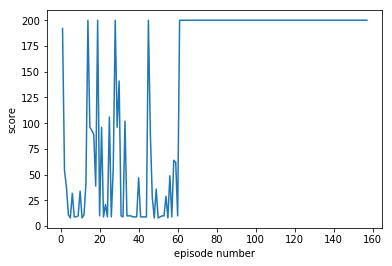

In [ ]:
'''
plot the scores
'''
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores) + 1), scores)
plt.xlabel('episode number')
plt.ylabel('score')
plt.show()

In [ ]:
'''
agent in action
'''
env = gym.make('CartPole-v0')
state = env.reset()

while True:
    env.render()
    #action 
    action = policy.act(state)
    state, reward, done, _ = env.step(action)
    if done:
        env.reset()
    
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
